In [76]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/home/peter/repositories/Typewriter/Image2Letter/.venv/lib64/python3.11/site-packages/pydantic/_internal/_fields.py:127: UserWarning: Field "model_server_url" has conflict with protected namespace "model_".

You may be able to resolve this warning by setting `model_config['protected_namespaces'] = ()`.
  warnings.warn(
/home/peter/repositories/Typewriter/Image2Letter/.venv/lib64/python3.11/site-packages/pydantic/_internal/_config.py:269: UserWarning: Valid config keys have changed in V2:
* 'schema_extra' has been renamed to 'json_schema_extra'
  warnings.warn(message, UserWarning)


torch.Size([1, 224, 224])
tensor(0.3451) tensor(0.9412)
tensor(0.3451) tensor(0.9412)


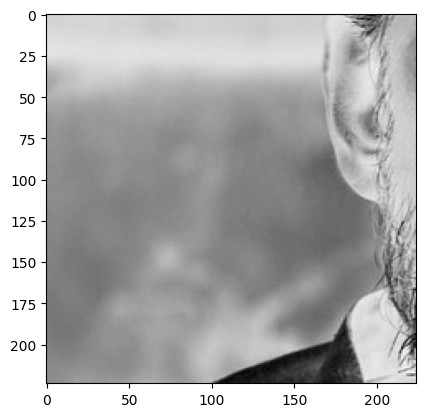

In [1]:
from data import get_img_transforms_train, get_img_transforms_train_target, BigImagesDataset,  get_img_transforms_test, get_img_transforms_test_target, BigImagesDataModule
import config.config as config
import matplotlib.pyplot as plt
from utils import convert_rgb_tensor_for_plot, convert_gray_tensor_for_plot


train_transforms = get_img_transforms_train(224)
train_target_transforms = get_img_transforms_train_target(224)
ds_train = BigImagesDataset(str(config.TRAINING_IMGS_DIR), train_transforms, train_target_transforms)

in_img, target, label = ds_train[100]
print(ds_train[0][0].shape)
print(in_img.min(), in_img.max())
print(target.min(), target.max())
plt.imshow(convert_gray_tensor_for_plot(in_img.unsqueeze(0)).squeeze(0).squeeze(0), cmap="gray")


Image([[[0.8392, 0.8392, 0.8392,  ..., 0.7882, 0.7882, 0.7922],
        [0.8392, 0.8392, 0.8392,  ..., 0.7882, 0.7882, 0.7961],
        [0.8431, 0.8431, 0.8431,  ..., 0.7843, 0.7804, 0.7843],
        ...,
        [0.6667, 0.6706, 0.6706,  ..., 0.8392, 0.8235, 0.8196],
        [0.6667, 0.6667, 0.6706,  ..., 0.8353, 0.8392, 0.8588],
        [0.6627, 0.6667, 0.6667,  ..., 0.8392, 0.8471, 0.8118]]], ) tensor(0.3451) tensor(0.9412)


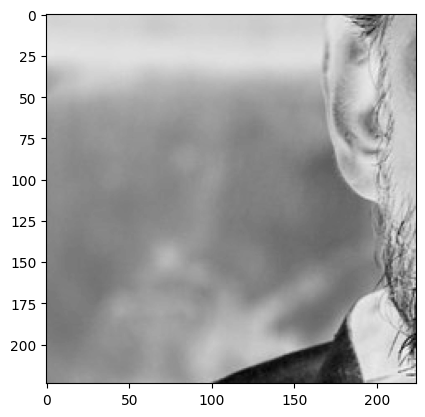

In [2]:
print(target, target.min(), target.max())
plt.imshow(target.unsqueeze(0).squeeze(0).squeeze(0), cmap="gray")


In [22]:
module = BigImagesDataModule(str(config.TRAINING_IMGS_DIR), 224, 448, 2, 1)
module.setup(stage="test")
dataloader_test = module.test_dataloader()
print(len(dataloader_test))
for batch in dataloader_test:
    img, target, label = batch
    print(img.shape, target.shape, label.shape, sep="\n")
    break


140


torch.Size([2, 3, 448, 448])
torch.Size([2, 1, 448, 448])
torch.Size([2])


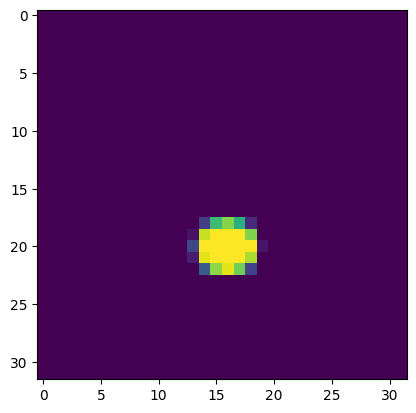

In [1]:
from utils import load_letter_conv_weights
import config.config as config
import matplotlib.pyplot as plt
# print(load_transp_conv_weights(str(config.FONT_PATH), 34, config.TYPEWRITER_CONFIG["letterList"])[0][0])
convs = load_letter_conv_weights(str(config.FONT_PATH), 32, config.TYPEWRITER_CONFIG["letterList"])
plt.imshow(convs[0][0].numpy())


In [2]:
from models import NeuralNetwork
import config.config as config
import matplotlib.pyplot as plt

net = NeuralNetwork(str(config.FONT_PATH), 32, round(32*0.035), 5, config.TYPEWRITER_CONFIG["letterList"])



/home/peter/repositories/Typewriter/Image2Letter/.venv/lib64/python3.11/site-packages/pydantic/_internal/_fields.py:127: UserWarning: Field "model_server_url" has conflict with protected namespace "model_".

You may be able to resolve this warning by setting `model_config['protected_namespaces'] = ()`.
  warnings.warn(
/home/peter/repositories/Typewriter/Image2Letter/.venv/lib64/python3.11/site-packages/pydantic/_internal/_config.py:269: UserWarning: Valid config keys have changed in V2:
* 'schema_extra' has been renamed to 'json_schema_extra'
  warnings.warn(message, UserWarning)


ImportError: cannot import name 'NeuralNetwork' from 'models' (/home/peter/repositories/Typewriter/Image2Letter/image2letterAI/models.py)

torch.Size([1, 1, 224, 224])
torch.Size([1, 100, 112, 112])
tensor([[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.6417],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]

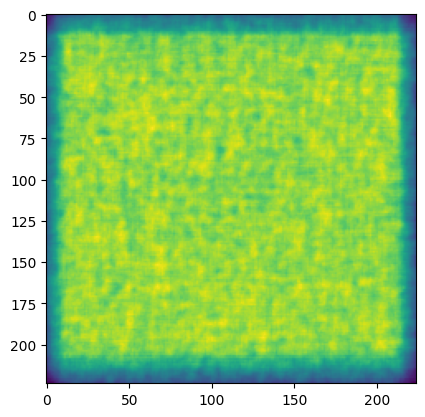

In [2]:
import torch

test_input = torch.randn(1, 3, 224, 224)
output, type_hits = net(test_input)
plt.imshow(output.detach().numpy()[0][0])
print(output.shape)
print(type_hits.shape)
print(type_hits[0][:])

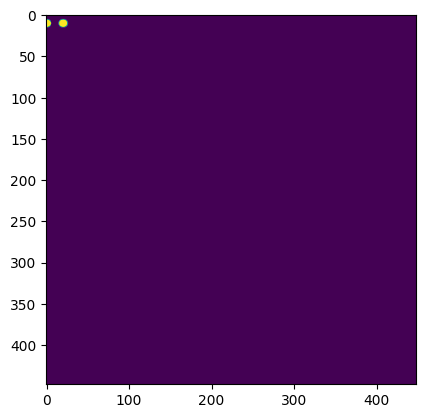

In [3]:
input_tensor = torch.zeros(1, 100, 224, 224)
input_tensor[0][0][0][0] = 0.5
input_tensor[0][0][0][10] = 0.5

output_transp = net.transp_conv(input_tensor)
plt.imshow(output_transp.detach().numpy()[0][0])

In [13]:
from utils import TypeRLoss
from train import TypeRNet
import config.config as configFile
import matplotlib.pyplot as plt
import torch
import datetime
from data import get_img_transforms_train, get_img_transforms_train_target, BigImagesDataset,  get_img_transforms_test, get_img_transforms_test_target, BigImagesDataModule
from utils import convert_rgb_tensor_for_plot, convert_gray_tensor_for_plot


config = {
    "experiment_name": "simple Net "+ str(datetime.datetime.now()),
    "tracking_uri": "/content/drive/MyDrive/mlflow-runs",

    "lr" : 1e-4,
    "alpha" : 1.,
    "beta" : 0.,
    "gamma" : 0.,

    "sched_step_size" : 8,
    "sched_gamma" : 0.1,

    "img_dir" : str(configFile.TRAINING_IMGS_DIR),
    "img_size" : 224,
    "img_size_test": 448,
    "batch_size": 1,
    "val_ratio" : 0.2,
    "test_ratio" : 0.2,
    "num_epochs": 5,
    "precision": 32,

    "font_path": str(configFile.FONT_PATH),
    "transposed_kernel_size" : 31,
    "transposed_stride": 4,
    "transposed_padding": 15,
    "letters": configFile.TYPEWRITER_CONFIG["letterList"],
    "eps_out": 1./100,
    }

net = TypeRNet(config=config)
test_batch = torch.randn((2, 1, 224, 224)), torch.rand((2, 1, 224,224)), torch.tensor([0,1])
train_transforms = get_img_transforms_train(config["img_size"])
train_target_transforms = get_img_transforms_train_target(config["img_size"])
ds_train = BigImagesDataset(str(configFile.TRAINING_IMGS_DIR), train_transforms, train_target_transforms)

in_img, target, label = ds_train[100]
loss = net.training_step(test_batch, 0)

out_img, key_strokes = net.forward(in_img.unsqueeze(0))
print(loss)

tensor(0.2161, grad_fn=<MulBackward0>)


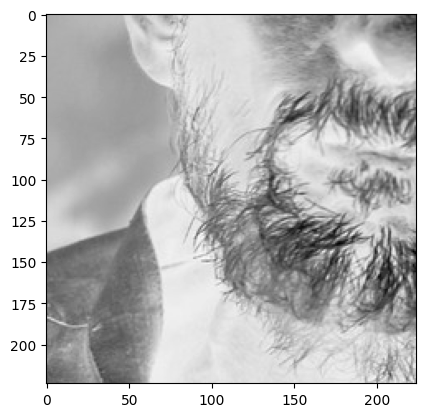

In [14]:
plt.imshow(convert_gray_tensor_for_plot(in_img.unsqueeze(0)).squeeze(0).squeeze(0), cmap="gray")

torch.Size([1, 1, 224, 224]) tensor(0., grad_fn=<MinBackward1>) tensor(0.4240, grad_fn=<MaxBackward1>)


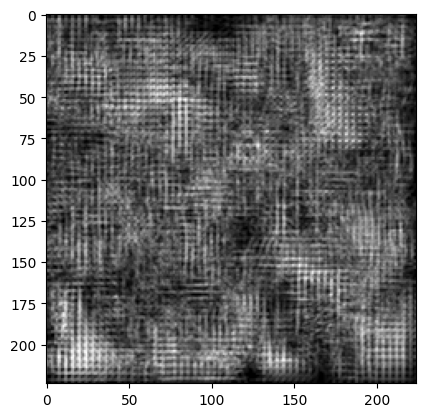

In [15]:
print(out_img.shape, out_img.min(), out_img.max())
plt.imshow(convert_gray_tensor_for_plot(out_img.detach().cpu()).squeeze(0).squeeze(0), cmap="gray")

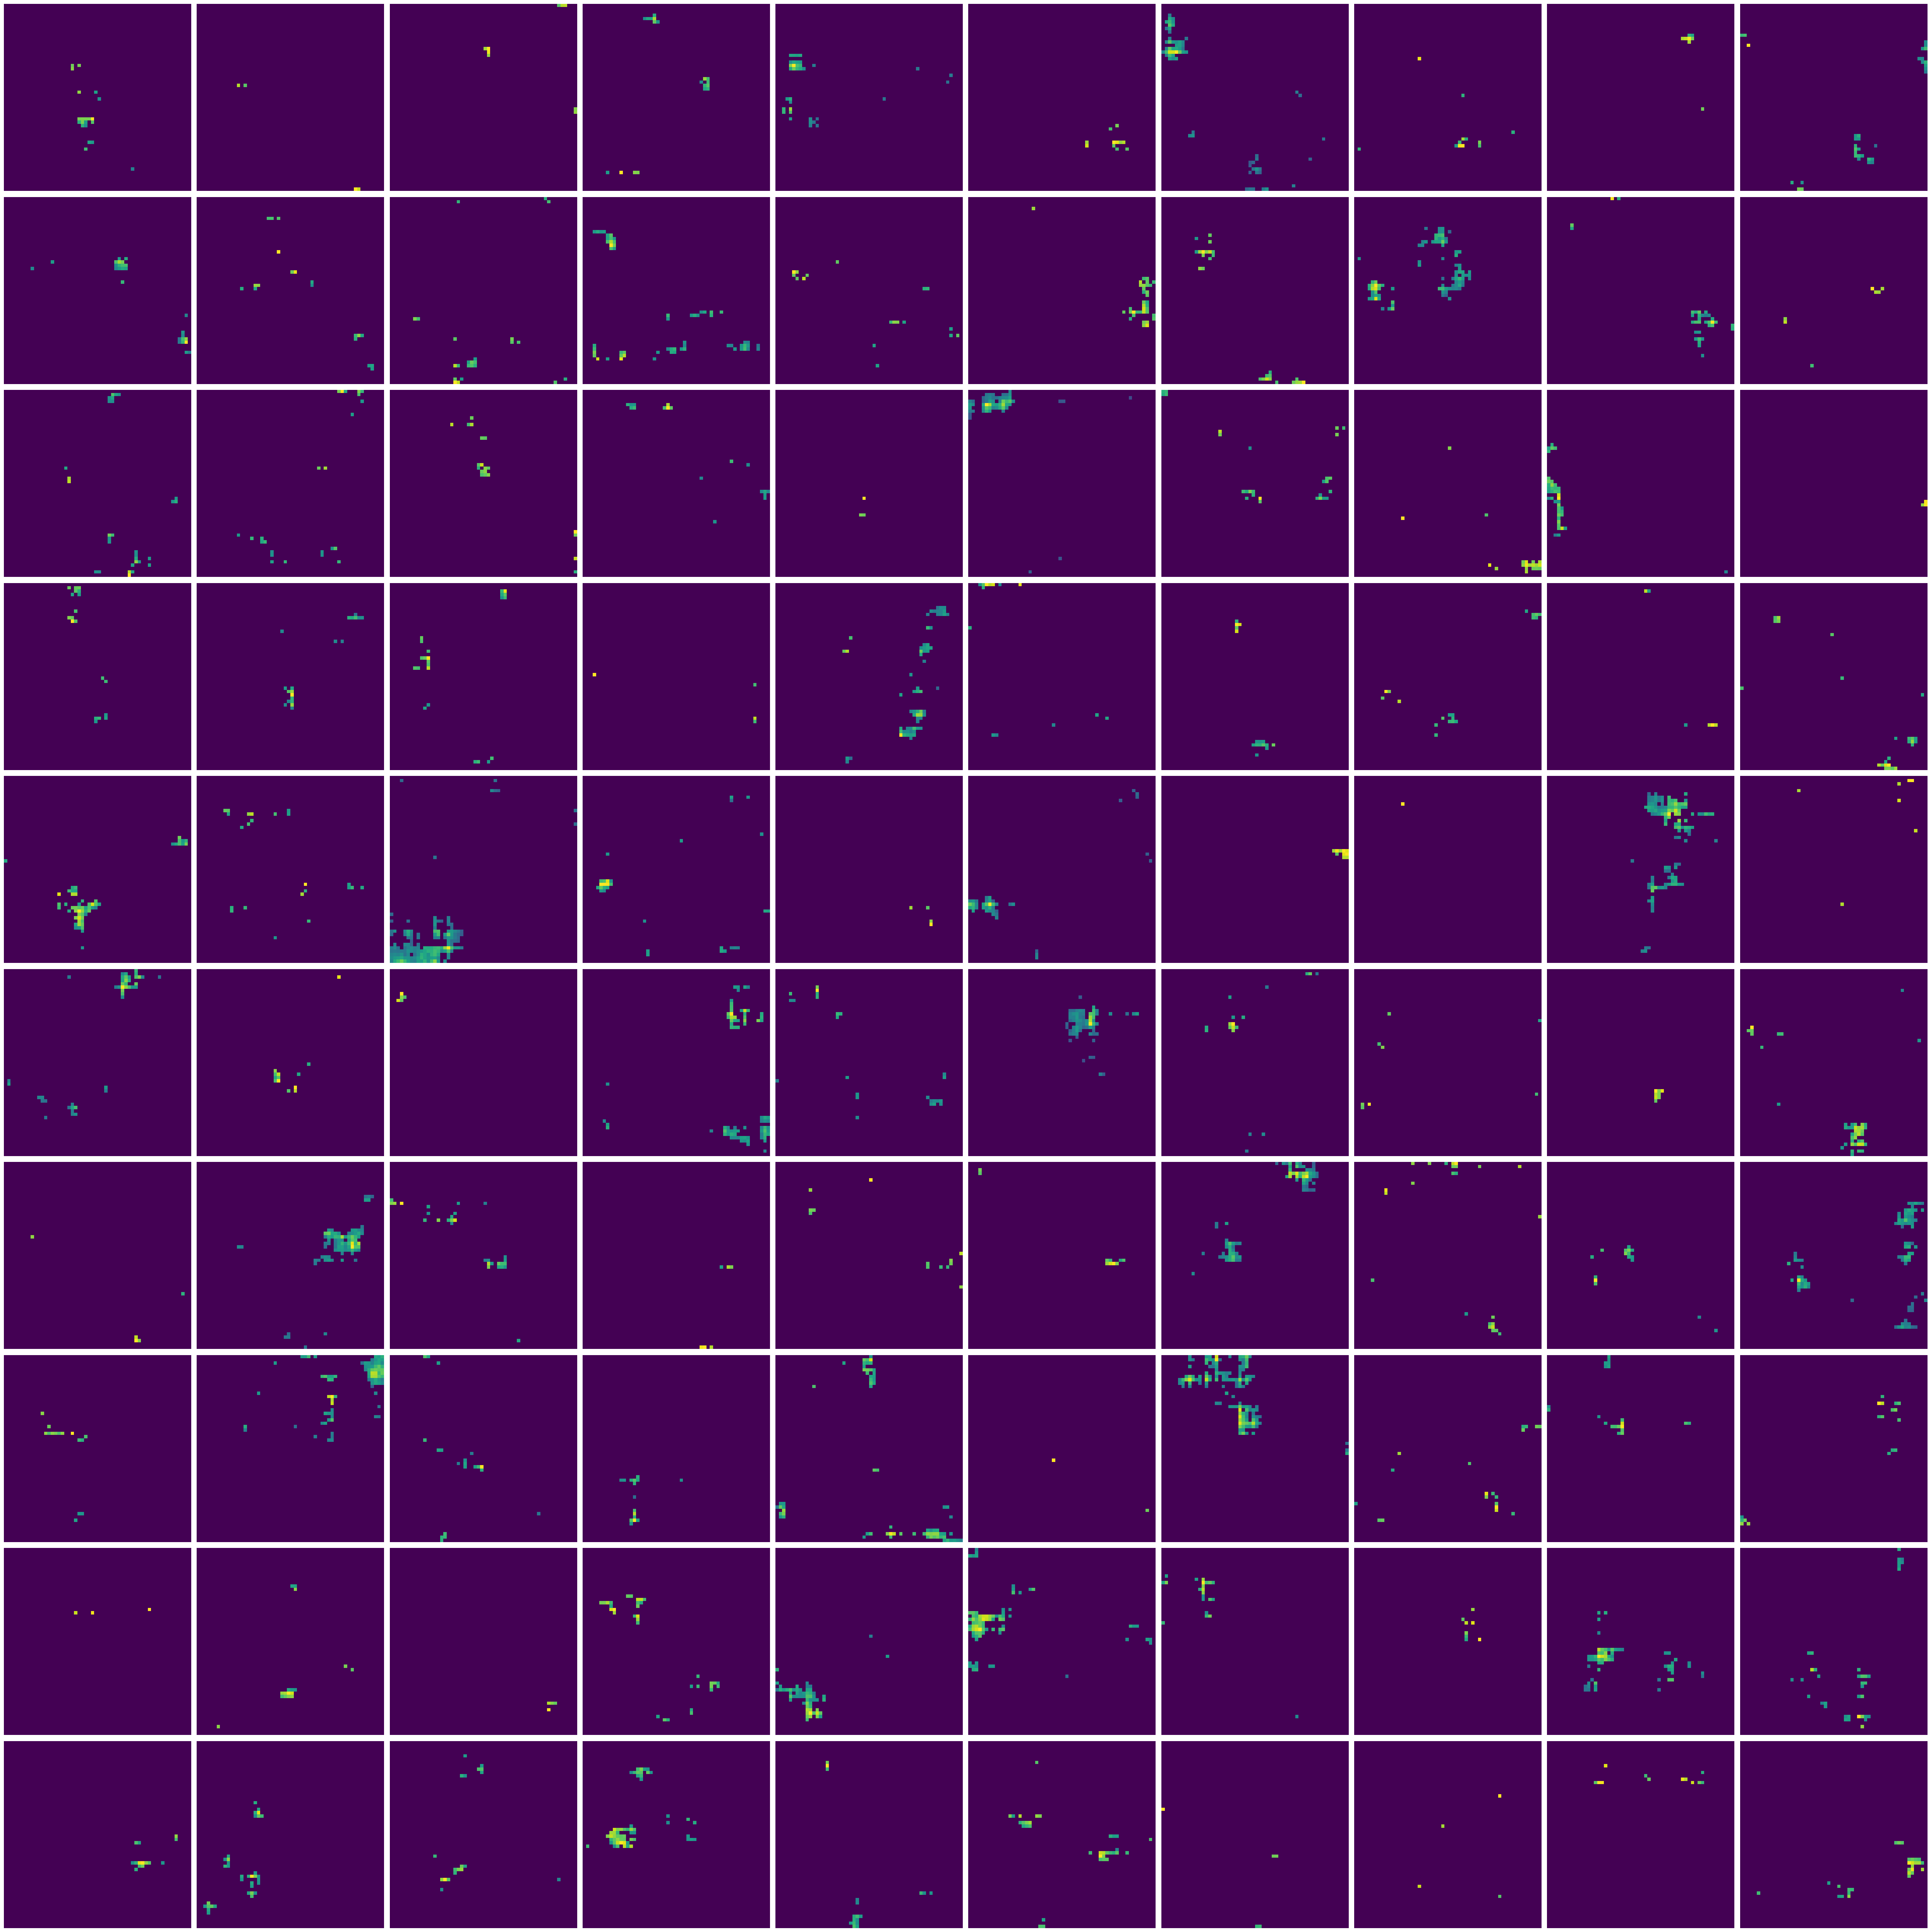

In [8]:
rows = 10
cols = 10

plt.figure(figsize=(cols * 5, rows * 5))

# Iterate through the images and plot them
for i in range(100):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(key_strokes[0][i].detach().cpu())  # Use cmap='gray' for grayscale images
    plt.axis('off')  # Turn off axis labels and ticks

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

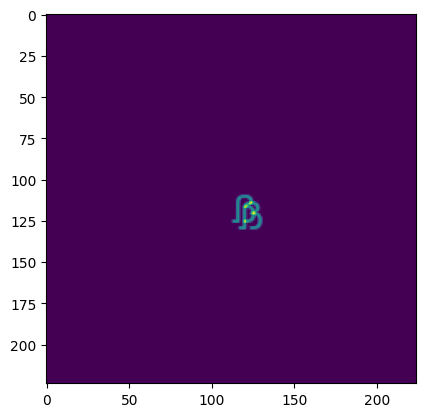

In [21]:
input_tensor = torch.zeros(1, 100, 56, 56)
input_tensor[0][58][30][30] = 0.5
input_tensor[0][58][31][31] = 0.5

output_transp = net.transp_conv(input_tensor)
plt.imshow(output_transp.detach().numpy()[0][0])

In [17]:
from utils import calc_receptive_field

calc_receptive_field([(7, 2, 3), (15,  1, 7), (15,  1, 7)])

63

In [2]:
import torchvision.models as models
models.resnet18(weights=models.ResNet18_Weights.DEFAULT)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [1]:
from train import tune_typeR

tune_typeR(1, 0)

(pid=15728) /home/peter/repositories/Typewriter/Image2Letter/.venv/lib64/python3.11/site-packages/pydantic/_internal/_fields.py:127: UserWarning: Field "model_server_url" has conflict with protected namespace "model_".
(pid=15728) 
(pid=15728) You may be able to resolve this warning by setting `model_config['protected_namespaces'] = ()`.
(pid=15728)   warnings.warn(
(pid=15728) /home/peter/repositories/Typewriter/Image2Letter/.venv/lib64/python3.11/site-packages/pydantic/_internal/_config.py:269: UserWarning: Valid config keys have changed in V2:
(pid=15728) * 'schema_extra' has been renamed to 'json_schema_extra'
(pid=15728)   warnings.warn(message, UserWarning)
(train_typeR pid=15728) 2023/11/01 22:43:24 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of pytorch. If you encounter errors during autologging, try upgrading / downgrading pytorch to a supported version, or try upgrading MLflow.
(train_typeR pid=15728) 2023/11/01 22:43:24 INFO mlflow.tracking.f

Sanity Checking: 0it [00:00, ?it/s]m 
Sanity Checking DataLoader 0:  50%|█████     | 1/2 [00:11<00:11, 11.84s/it]


(train_typeR pid=15728) /home/peter/repositories/Typewriter/Image2Letter/.venv/lib64/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:442: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
(train_typeR pid=15728)   rank_zero_warn(


Epoch 0:   0%|          | 0/841 [00:00<?, ?it/s]                           


2023-11-01 22:44:15,098	WARNING tune.py:192 -- Stop signal received (e.g. via SIGINT/Ctrl+C), ending Ray Tune run. This will try to checkpoint the experiment state one last time. Press CTRL+C (or send SIGINT/SIGKILL/SIGTERM) to skip. 
2023-11-01 22:44:25,112	INFO tune.py:1148 -- Total run time: 70.02 seconds (59.92 seconds for the tuning loop).
2023-11-01 22:44:25,114	WARNING tune.py:1163 -- Experiment has been interrupted, but the most recent state was saved.
Resume experiment with: Tuner.restore(path="/home/peter/ray_results/tune_typeR", trainable=...)
2023-11-01 22:44:25,125	WARNING experiment_analysis.py:916 -- Failed to read the results for 1 trials:
- /home/peter/ray_results/tune_typeR/train_typeR_a9894_00000_0_batch_size=1,lr=0.0003,precision=32_2023-11-01_22-43-15


Best hyperparameters found were:  {'experiment_name': 'reverse Net 2023-11-01 22:43:08.521573', 'tracking_uri': '/home/peter/repositories/Typewriter/Image2Letter/data/mlflow-run-logs', 'lr': 0.00031889526814289453, 'alpha': 1.0, 'beta': 0.0, 'gamma': 0.0, 'sched_step_size': 8, 'sched_gamma': 0.1, 'img_dir': '/home/peter/repositories/Typewriter/Image2Letter/data/trainingImages', 'img_size': 224, 'img_size_test': 224, 'batch_size': 1, 'val_ratio': 0.2, 'test_ratio': 0.2, 'num_epochs': 5, 'precision': 32, 'font_path': '/home/peter/repositories/Typewriter/Image2Letter/data/SamsungSQ-1000/font.otf', 'transposed_kernel_size': 31, 'transposed_stride': 4, 'transposed_padding': 15, 'keystrokes_mean': 0.05, 'keystrokes_std': 0.2, 'letters': ['.', '>', '‰', '<', '|', "'", '³', '_', 'Y', 'J', '?', 'X', 'Ö', 'V', 'B', 'W', 'P', 'Q', 'H', 'S', 'A', 'I', 'O', 'E', 'U', 'L', 'R', 'T', 'C', 'N', 'G', 'D', 'F', 'M', 'Z', 'K', 'Ä', 'Ü', ';', '!', '"', '§', '$', '=', '%', '&', '/', '(', ')', '`', '*', '°'

(train_typeR pid=15728) Traceback (most recent call last):
(train_typeR pid=15728)   File "python/ray/_raylet.pyx", line 1364, in ray._raylet.execute_task.function_executor
(train_typeR pid=15728)   File "/home/peter/repositories/Typewriter/Image2Letter/.venv/lib64/python3.11/site-packages/ray/_private/function_manager.py", line 726, in actor_method_executor
(train_typeR pid=15728)     return method(__ray_actor, *args, **kwargs)
(train_typeR pid=15728)            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
(train_typeR pid=15728)   File "/home/peter/repositories/Typewriter/Image2Letter/.venv/lib64/python3.11/site-packages/ray/util/tracing/tracing_helper.py", line 464, in _resume_span
(train_typeR pid=15728)     return method(self, *_args, **_kwargs)
(train_typeR pid=15728)            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
(train_typeR pid=15728)   File "/home/peter/repositories/Typewriter/Image2Letter/.venv/lib64/python3.11/site-packages/ray/tune/trainable/trainable.py", line 372, in train
(train_ty

In [4]:
from utils import get_rel_area_letters
import config.config as config
# print(load_transp_conv_weights(str(config.FONT_PATH), 34, config.TYPEWRITER_CONFIG["letterList"])[0][0])
rel_areas = get_rel_area_letters(str(config.FONT_PATH), config.TYPEWRITER_CONFIG["letterList"])
for index, value in enumerate(rel_areas):
    if(index % 10 == 0):
        print("\n")
    print(round(value, 2), ", ", sep="", end="")



1.61, 4.41, 8.74, 4.4, 5.24, 1.47, 3.58, 3.2, 6.46, 5.91, 

4.79, 7.82, 8.86, 6.53, 8.95, 8.85, 7.44, 9.08, 8.59, 7.77, 

8.07, 5.52, 7.54, 8.54, 7.29, 6.45, 8.5, 7.17, 6.6, 8.73, 

7.87, 7.64, 7.17, 9.36, 7.14, 8.2, 9.4, 8.61, 3.66, 3.71, 

2.76, 8.73, 7.34, 4.33, 6.28, 6.63, 3.52, 4.21, 4.21, 1.0, 

3.69, 3.45, 3.23, 7.38, 3.54, 2.6, 7.1, 5.63, 7.88, 6.6, 

7.73, 5.58, 8.21, 7.18, 8.64, 8.68, 7.21, 6.79, 6.91, 4.9, 

6.41, 7.23, 6.08, 5.01, 5.29, 5.47, 6.02, 6.43, 8.11, 7.93, 

6.55, 8.55, 5.98, 7.16, 8.23, 7.41, 2.29, 4.71, 6.4, 5.91, 

6.49, 6.88, 6.53, 7.13, 4.46, 7.9, 7.14, 1.0, 4.06, 6.6, 